# Geely Automobile 

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

## Step 1: Reading and Understanding the Data

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [279]:
#Importing dataset
car_df = pd.read_csv('CarPrice_Assignment.csv')

In [280]:
#analyze the dataframe
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [281]:
# Total records in the dataframe is 205 and 26 columns
car_df.shape

(205, 26)

In [282]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### Seems like there is no null value in the dataframe , hence cleaning and imputing is not required

## Step 2 : Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [283]:
#Removing the car Name from the dataframe and renaming the column to Car Company
car_df['CarName']=car_df['CarName'].str.split(' ').str[0]
car_df.rename(index=str, columns={"CarName": "CarCompany"},inplace=True)

In [284]:
#analyze the dataframe
car_df.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [285]:
# distinct Car Company to check all names are consistent or not ,certainly the names are incorrectly spelled 
car_df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [286]:
#Correcting the incorrect names in the dataframe
car_df.CarCompany.replace(['Nissan', 'toyouta','porcshce','vw','vokswagen','maxda']
                        , ['nissan', 'toyota','porsche','volkswagen','volkswagen','mazda'], inplace=True)

In [287]:
#check the dataframe again
car_df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [288]:
#checking the distinct value in dataframe ,Car ID is unique ,no duplicate values
car_df.nunique()

car_ID              205
symboling             6
CarCompany           22
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [289]:
#Drop the carId as it is unique and does not have any impact 
car_df.drop(['car_ID'], axis =1, inplace = True)

In [290]:
car_df.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Analyze all the columns
#### Check highly correlated variables
- carlength,carwidth and curbweight
- highwaympg and Citympg

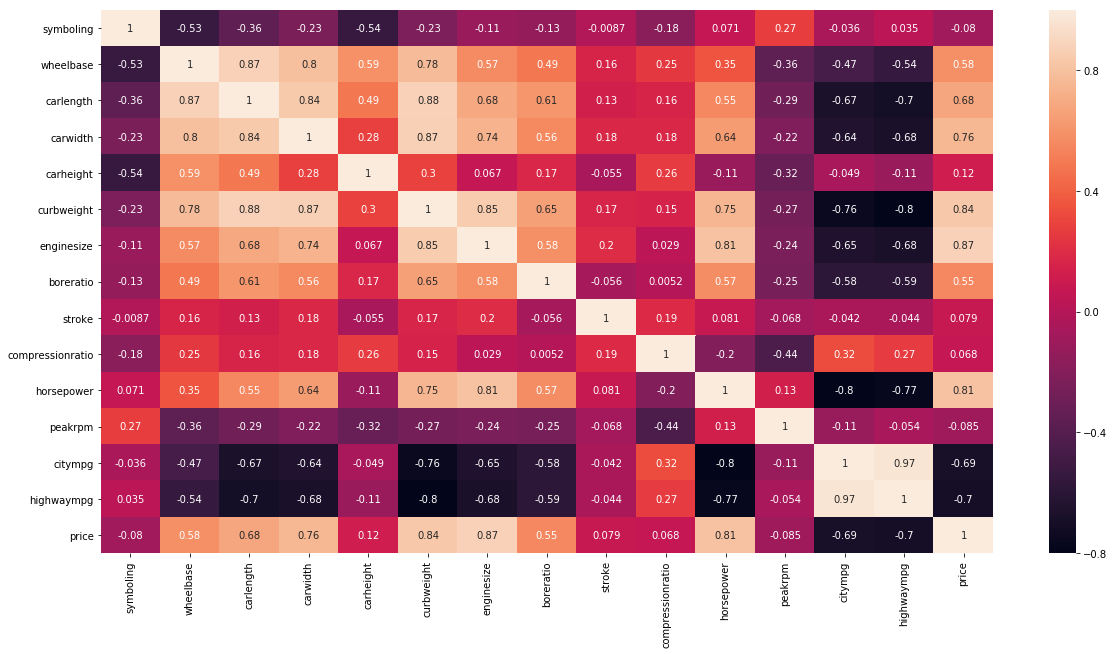

In [291]:
plt.figure(figsize = (20,10))  
sns.heatmap(car_df._get_numeric_data().corr(),annot = True)

In [292]:
#There is a high correlation between the wheelbase,carlength,carwidth and curbweight ,hence dropping 3 and keeping one
car_df.drop(['carwidth','curbweight','wheelbase'], axis =1, inplace = True)

In [293]:
#There is a high correlation between the highwaympg and Citympg ,hence dropping 1 and keeping one
car_df.drop(['citympg'], axis =1, inplace = True)

In [294]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling           205 non-null int64
CarCompany          205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(5), object(10)
memory usage: 35.2

### Dealing with Categorical variables
#### Covert the characters to numerical values for column with distinct value as 2
- FuelType 1(Gas) 0(Diesel)
- Aspiration 1(Std) 0(Turbo)
- DoorNumber 2(two) 4(Four)
- EngineLocation 1(front) 0(rear)
- Cylindernumber 2(two),3(three),4(four),5(five),6(six),7(seven),8(eight),12(twelve)

In [295]:
#Fuel Type ,Only two distinct values ,hence convert them to numbers
car_df['fueltype']=car_df['fueltype'].map({'gas':1,'diesel':0})

In [296]:
#Aspiration has two distinct values ,hence convert them to numbers
car_df['aspiration']=car_df['aspiration'].map({'std':1,'turbo':0})

In [297]:
#doornumber has two distinct values ,hence convert them to numbers
car_df['doornumber']=car_df['doornumber'].map({'two':0,'four':1})

In [298]:
#enginelocation has two distinct values ,hence convert them to numbers
car_df['enginelocation']=car_df['enginelocation'].map({'front':1,'rear':0})

In [299]:
car_df.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,3,alfa-romero,1,1,0,convertible,rwd,1,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,27,13495.0
1,3,alfa-romero,1,1,0,convertible,rwd,1,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,27,16500.0
2,1,alfa-romero,1,1,0,hatchback,rwd,1,171.2,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,26,16500.0
3,2,audi,1,1,1,sedan,fwd,1,176.6,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,30,13950.0
4,2,audi,1,1,1,sedan,4wd,1,176.6,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,22,17450.0


In [300]:
#check the cylinernumber ,convert them to numbers
print(car_df['cylindernumber'].unique())
car_df.cylindernumber.replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
                        , [4, 6, 5, 3, 12, 2, 8 ], inplace=True)
print(car_df['cylindernumber'].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
[ 4  6  5  3 12  2  8]


In [301]:
car_df.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,3,alfa-romero,1,1,0,convertible,rwd,1,168.8,48.8,...,4,130,mpfi,3.47,2.68,9.0,111,5000,27,13495.0
1,3,alfa-romero,1,1,0,convertible,rwd,1,168.8,48.8,...,4,130,mpfi,3.47,2.68,9.0,111,5000,27,16500.0
2,1,alfa-romero,1,1,0,hatchback,rwd,1,171.2,52.4,...,6,152,mpfi,2.68,3.47,9.0,154,5000,26,16500.0
3,2,audi,1,1,1,sedan,fwd,1,176.6,54.3,...,4,109,mpfi,3.19,3.40,10.0,102,5500,30,13950.0
4,2,audi,1,1,1,sedan,4wd,1,176.6,54.3,...,5,136,mpfi,3.19,3.40,8.0,115,5500,22,17450.0


### Dummy Variables
- carbody
- CarCompany
- driveWheel
- EngineType
- FuelType
- cylindernumber XX

In [302]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'body'
# we don't need five columns. We can drop the `convertible` column, as the type of body can be identified with just the four columns where — 
body = pd.get_dummies(car_df['carbody'], drop_first = True,prefix="carbody_")

# Add the results to the original Car dataframe
car_df = pd.concat([car_df, body], axis = 1)

#drop the original column 
car_df.drop(['carbody'], axis =1, inplace = True)
car_df.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,drivewheel,enginelocation,carlength,carheight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,carbody__hardtop,carbody__hatchback,carbody__sedan,carbody__wagon
0,3,alfa-romero,1,1,0,rwd,1,168.8,48.8,dohc,...,2.68,9.0,111,5000,27,13495.0,0,0,0,0
1,3,alfa-romero,1,1,0,rwd,1,168.8,48.8,dohc,...,2.68,9.0,111,5000,27,16500.0,0,0,0,0
2,1,alfa-romero,1,1,0,rwd,1,171.2,52.4,ohcv,...,3.47,9.0,154,5000,26,16500.0,0,1,0,0
3,2,audi,1,1,1,fwd,1,176.6,54.3,ohc,...,3.40,10.0,102,5500,30,13950.0,0,0,1,0
4,2,audi,1,1,1,4wd,1,176.6,54.3,ohc,...,3.40,8.0,115,5500,22,17450.0,0,0,1,0


In [303]:
#dealing with CarCompany
companies = pd.get_dummies(car_df['CarCompany'], drop_first = True,prefix="CarCompany_")

# Add the results to the original Car dataframe
car_df = pd.concat([car_df, companies], axis = 1)

#drop the original column 
car_df.drop(['CarCompany'], axis =1, inplace = True)
car_df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,...,CarCompany__nissan,CarCompany__peugeot,CarCompany__plymouth,CarCompany__porsche,CarCompany__renault,CarCompany__saab,CarCompany__subaru,CarCompany__toyota,CarCompany__volkswagen,CarCompany__volvo
0,3,1,1,0,rwd,1,168.8,48.8,dohc,4,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,0,rwd,1,168.8,48.8,dohc,4,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,rwd,1,171.2,52.4,ohcv,6,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,fwd,1,176.6,54.3,ohc,4,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,1,4wd,1,176.6,54.3,ohc,5,...,0,0,0,0,0,0,0,0,0,0


In [304]:
#dealing with drivewheel
drive_wheel = pd.get_dummies(car_df['drivewheel'], drop_first = True,prefix="drivewheel_")

# Add the results to the original Car dataframe
car_df = pd.concat([car_df, drive_wheel], axis = 1)

#drop the original column 
car_df.drop(['drivewheel'], axis =1, inplace = True)
car_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,...,CarCompany__plymouth,CarCompany__porsche,CarCompany__renault,CarCompany__saab,CarCompany__subaru,CarCompany__toyota,CarCompany__volkswagen,CarCompany__volvo,drivewheel__fwd,drivewheel__rwd
0,3,1,1,0,1,168.8,48.8,dohc,4,130,...,0,0,0,0,0,0,0,0,0,1
1,3,1,1,0,1,168.8,48.8,dohc,4,130,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,1,171.2,52.4,ohcv,6,152,...,0,0,0,0,0,0,0,0,0,1
3,2,1,1,1,1,176.6,54.3,ohc,4,109,...,0,0,0,0,0,0,0,0,1,0
4,2,1,1,1,1,176.6,54.3,ohc,5,136,...,0,0,0,0,0,0,0,0,0,0


In [305]:
#dealing with enginetype
engine_type = pd.get_dummies(car_df['enginetype'], drop_first = True,prefix="enginetype_")

# Add the results to the original Car dataframe
car_df = pd.concat([car_df, engine_type], axis = 1)

#drop the original column 
car_df.drop(['enginetype'], axis =1, inplace = True)
car_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,fuelsystem,...,CarCompany__volkswagen,CarCompany__volvo,drivewheel__fwd,drivewheel__rwd,enginetype__dohcv,enginetype__l,enginetype__ohc,enginetype__ohcf,enginetype__ohcv,enginetype__rotor
0,3,1,1,0,1,168.8,48.8,4,130,mpfi,...,0,0,0,1,0,0,0,0,0,0
1,3,1,1,0,1,168.8,48.8,4,130,mpfi,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,0,1,171.2,52.4,6,152,mpfi,...,0,0,0,1,0,0,0,0,1,0
3,2,1,1,1,1,176.6,54.3,4,109,mpfi,...,0,0,1,0,0,0,1,0,0,0
4,2,1,1,1,1,176.6,54.3,5,136,mpfi,...,0,0,0,0,0,0,1,0,0,0


In [306]:
#dealing with fuelsystem
fuel_system = pd.get_dummies(car_df['fuelsystem'], drop_first = True,prefix="fuelsystem_")

# Add the results to the original Car dataframe
car_df = pd.concat([car_df, fuel_system], axis = 1)

#drop the original column 
car_df.drop(['fuelsystem'], axis =1, inplace = True)
car_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,...,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,fuelsystem__2bbl,fuelsystem__4bbl,fuelsystem__idi,fuelsystem__mfi,fuelsystem__mpfi,fuelsystem__spdi,fuelsystem__spfi
0,3,1,1,0,1,168.8,48.8,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,0,1,168.8,48.8,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,1,171.2,52.4,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,1,1,1,1,176.6,54.3,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,1,1,176.6,54.3,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [307]:
#dealing with cylindernumber
#cylinder_number = pd.get_dummies(car_df['cylindernumber'], drop_first = True,prefix="cylindernumber_")

# Add the results to the original Car dataframe
#car_df = pd.concat([car_df, cylinder_number], axis = 1)

#drop the original column 
#car_df.drop(['cylindernumber'], axis =1, inplace = True)
#car_df.head()

In [308]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 56 columns):
symboling                 205 non-null int64
fueltype                  205 non-null int64
aspiration                205 non-null int64
doornumber                205 non-null int64
enginelocation            205 non-null int64
carlength                 205 non-null float64
carheight                 205 non-null float64
cylindernumber            205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
highwaympg                205 non-null int64
price                     205 non-null float64
carbody__hardtop          205 non-null uint8
carbody__hatchback        205 non-null uint8
carbody__sedan            205 non-null uint8
carbody__wagon            205 non

## Splitting the Data into Training and Testing Sets

In [309]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
car_df_train, car_df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [310]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [311]:
cols_to_scale = ['symboling', 'carlength', 'carheight','cylindernumber',
         'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'highwaympg', 'price']

In [312]:
car_df_train[cols_to_scale] = scaler.fit_transform(car_df_train[cols_to_scale])

car_df_train.head()

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,...,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,fuelsystem__2bbl,fuelsystem__4bbl,fuelsystem__idi,fuelsystem__mfi,fuelsystem__mpfi,fuelsystem__spdi,fuelsystem__spfi
122,0.6,1,1,1,1,0.426016,0.265487,0.2,0.139623,0.230159,...,0,0,0,1,0,0,0,0,0,0
125,1.0,1,1,0,1,0.452033,0.212389,0.2,0.339623,1.000000,...,0,0,0,0,0,0,0,1,0,0
166,0.6,1,1,0,1,0.448780,0.424779,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1,1,0,1,0.450407,0.088496,0.2,0.260377,0.626984,...,0,0,0,0,0,0,0,1,0,0
199,0.2,1,0,1,1,0.775610,0.858407,0.2,0.260377,0.746032,...,0,0,0,0,0,0,0,1,0,0


In [313]:
car_df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,...,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,fuelsystem__2bbl,fuelsystem__4bbl,fuelsystem__idi,fuelsystem__mfi,fuelsystem__mpfi,fuelsystem__spdi,fuelsystem__spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.909091,0.818182,0.559441,0.993007,0.525476,0.509004,0.240559,0.241351,0.497946,...,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.204848,0.215378,0.115818,0.154619,0.207140,...,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.399187,0.353982,0.200000,0.135849,0.305556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,1.000000,1.000000,1.000000,1.000000,0.502439,0.522124,0.200000,0.184906,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,1.000000,1.000000,1.000000,1.000000,0.669919,0.668142,0.200000,0.301887,0.682540,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


### Dividing into X and Y sets for the model building

In [314]:
Y_car_df_train = car_df_train.pop('price')
X_car_df_train = car_df_train

## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [315]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [316]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_car_df_train, Y_car_df_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_car_df_train, Y_car_df_train)

In [317]:
list(zip(X_car_df_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 28),
 ('fueltype', False, 23),
 ('aspiration', False, 7),
 ('doornumber', False, 36),
 ('enginelocation', False, 29),
 ('carlength', True, 1),
 ('carheight', False, 17),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 24),
 ('horsepower', False, 20),
 ('peakrpm', False, 5),
 ('highwaympg', False, 6),
 ('carbody__hardtop', False, 12),
 ('carbody__hatchback', False, 9),
 ('carbody__sedan', False, 11),
 ('carbody__wagon', False, 10),
 ('CarCompany__audi', False, 2),
 ('CarCompany__bmw', True, 1),
 ('CarCompany__buick', True, 1),
 ('CarCompany__chevrolet', False, 43),
 ('CarCompany__dodge', False, 18),
 ('CarCompany__honda', False, 34),
 ('CarCompany__isuzu', False, 31),
 ('CarCompany__jaguar', False, 32),
 ('CarCompany__mazda', False, 19),
 ('CarCompany__mercury', False, 44),
 ('CarCompany__mitsubishi', False, 13),
 ('CarCompany__nissan', False, 33),
 ('CarCompany__peugeot', False, 41